<a href="https://colab.research.google.com/github/wama-nigam/deploy-ml-model/blob/main/Movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [1]:
import transformers


In [2]:
from transformers import AutoModel, BertTokenizerFast

In [3]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=867c0af78c1363aec6bcf89ccdf03d3ce19aa5433277e5d61c81b9340e6a45df
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [4]:
from sentence_transformers import SentenceTransformer

In [5]:
bert = SentenceTransformer('bert-base-nli-mean-tokens')

.gitattributes:   0%|          | 0.00/391 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [7]:
movies = pd.read_csv('/content/movies.csv')

In [ ]:
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
movies.shape

(4803, 24)

In [ ]:
movies.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [8]:
required = ['genres','keywords','title','cast','director']

In [9]:
for idx in required:
  movies[idx] = movies[idx].fillna('')

In [ ]:
movies.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [10]:
new_movie = movies['genres']+' '+movies['keywords']+' '+movies['title']+' '+movies['cast']+' '+movies['director']

In [ ]:
new_movie.head()

0    Action Adventure Fantasy Science Fiction cultu...
1    Adventure Fantasy Action ocean drug abuse exot...
2    Action Adventure Crime spy based on novel secr...
3    Action Crime Drama Thriller dc comics crime fi...
4    Action Adventure Science Fiction based on nove...
dtype: object

BERT Encoder

In [11]:
sentence_embedding = bert.encode(new_movie.tolist())

In [12]:
similarity_bert = cosine_similarity(sentence_embedding)

In [13]:
similarity_bert

array([[0.99999994, 0.59125197, 0.5650886 , ..., 0.59164464, 0.3871681 ,
        0.53193265],
       [0.59125197, 0.9999998 , 0.687299  , ..., 0.7013787 , 0.5093822 ,
        0.63227236],
       [0.5650886 , 0.687299  , 0.9999998 , ..., 0.734436  , 0.47212398,
        0.6007513 ],
       ...,
       [0.59164464, 0.7013787 , 0.734436  , ..., 1.0000004 , 0.54419154,
        0.7837075 ],
       [0.3871681 , 0.5093822 , 0.47212398, ..., 0.54419154, 1.0000004 ,
        0.55198205],
       [0.53193265, 0.63227236, 0.6007513 , ..., 0.7837075 , 0.55198205,
        0.9999997 ]], dtype=float32)

Tf-Idf Vectorizer

In [22]:
vector = TfidfVectorizer()
feature = vector.fit_transform(new_movie)

pca_feature = vector.fit_transform(new_movie).toarray()
print(pca_feature)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

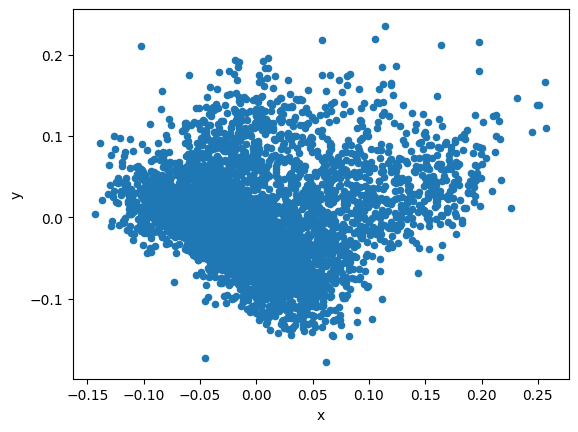

In [ ]:
pca = PCA(n_components = 2)

df2d = pd.DataFrame(pca.fit_transform(pca_feature),columns=['x','y'])

df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [23]:
similarity = cosine_similarity(feature)
print(similarity)

[[1.         0.0237934  0.04095406 ... 0.         0.         0.        ]
 [0.0237934  1.         0.01318767 ... 0.03982525 0.         0.        ]
 [0.04095406 0.01318767 1.         ... 0.         0.05773922 0.        ]
 ...
 [0.         0.03982525 0.         ... 1.         0.         0.05747071]
 [0.         0.         0.05773922 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.05747071 0.         1.        ]]


## Movie Recommendation **System**

---



In [20]:
your_movie = input('Enter movie name: ')

Enter movie name: toy story


In [28]:
def find_movie(title):

  list_of_title = movies['title'].tolist()

  #print(list_of_title)
  close_match = difflib.get_close_matches(your_movie,list_of_title)
  #print(close_match,close_match[0])
  index = movies[movies.title==close_match[0]]['index'].values[0]
  #print(index)

  similarity_score_bert = list(enumerate(similarity_bert[index]))
  similarity_score_tfidf = list(enumerate(similarity[index]))

  #print(similarity_score)
  sorted_sim_score_bert = sorted(similarity_score_bert,key = lambda x:x[1],reverse=True)
  sorted_sim_score_tfidf = sorted(similarity_score_tfidf,key = lambda x:x[1],reverse=True)
  #print(sorted_sim_score)

  #print top 10 movies
  i=1
  top_suggestions_bert=[]
  for idx in sorted_sim_score_bert:
    m_idx = idx[0]
    name = movies[movies.index==m_idx]['title'].values[0]
    if i<=10:
      top_suggestions_bert.append(name)
    else:
      break
    i+=1

  i=1
  top_suggestions_tfidf=[]
  for idx in sorted_sim_score_tfidf:
    m_idx = idx[0]
    name = movies[movies.index==m_idx]['title'].values[0]
    if i<=10:
      top_suggestions_tfidf.append(name)
    else:
      break
    i+=1
  return  [top_suggestions_bert, top_suggestions_tfidf]

In [29]:

temp1,temp2 = find_movie(your_movie)

print("List of top 10 related movies based on your search (BERT): ")

print(temp1)

print("List of top 10 related movies based on your search (TF-IDF): ")

print(temp2)

List of top 10 related movies based on your search (BERT): 
['Toy Story', 'The Lego Movie', 'Monster House', 'Antz', 'The Smurfs 2', 'The Brave Little Toaster', 'Inspector Gadget', 'Alvin and the Chipmunks: The Squeakquel', 'Meet the Deedles', 'Garfield']
List of top 10 related movies based on your search (TF-IDF): 
['Toy Story', 'Toy Story 2', 'Toy Story 3', 'Small Soldiers', 'Big', 'Spun', 'Cars 2', 'Monster House', 'Quest for Camelot', 'Home']
